In [1]:
import rasterio as rst
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.windows import Window, from_bounds

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

#### Sample forest

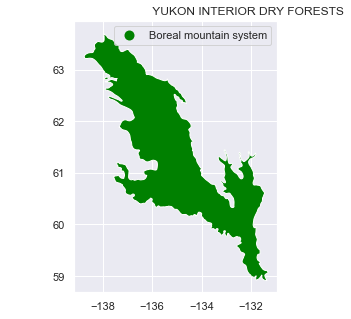

In [2]:
from IPython.display import Image
Image(filename='yukon_dry.png') 

According to the x & y-axis, the bounds of the forest are:

left : around -140

bottom : around 58

right : around -130

up : around 64

Plug these values into window = from_bounds(left, bottom, right, up, src.transform)

#### Crop large tif

In [3]:
with rst.open('GlocalSoilOC_GSOCmap1.5.0.tif') as src:
    # get height and width of the needed area from the map
    shape=src.read(1, window=from_bounds(-140, 58, -130, 64, src.transform)).shape
    
    # create a window
    window=from_bounds(-140, 58, -130, 64, src.transform)
    transform = src.window_transform(window)

    # create a new raster to write to
    profile = src.profile
    profile.update({
        'height': shape[0],
        'width': shape[1],
        'transform': transform})

    with rst.open('output_GlocalSoilOC_GSOC.tif', 'w', **profile) as dst:
        # read data from the window created and write it to the output raster
        dst.write(src.read(window=window))

#### View the output

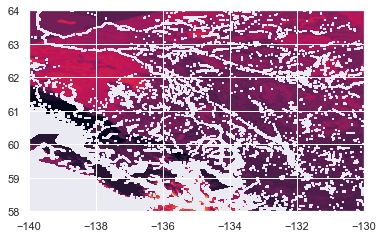

<AxesSubplot:>

In [4]:
rst_GlocalSoilOC_GSOC = r'output_GlocalSoilOC_GSOC.tif'
img_GlocalSoilOC_GSOC = rst.open(rst_GlocalSoilOC_GSOC)
show(img_GlocalSoilOC_GSOC)

#### Try another file

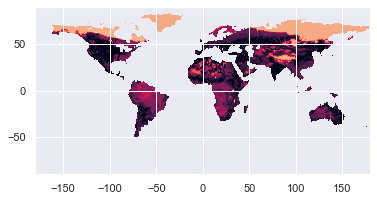

<AxesSubplot:>

In [5]:
#SoilResources_NutrientAvailability_GAEZ.tif

rst_srna = r'SoilResources_NutrientAvailability_GAEZ.tif'
img_srna = rst.open(rst_srna)
show(img_srna)

In [6]:
with rst.open('SoilResources_NutrientAvailability_GAEZ.tif') as src:
    # get height and width of the needed area from the map
    shape=src.read(1, window=from_bounds(-140, 58, -130, 64, src.transform)).shape
    
    # create a window
    window=from_bounds(-140, 58, -130, 64, src.transform)
    transform = src.window_transform(window)

    # create a new raster to write to
    profile = src.profile
    profile.update({
        'height': shape[0],
        'width': shape[1],
        'transform': transform})

    with rst.open('output_SoilResources_NutrientAvailability.tif', 'w', **profile) as dst:
        # read data from the window created and write it to the output raster
        dst.write(src.read(window=window))

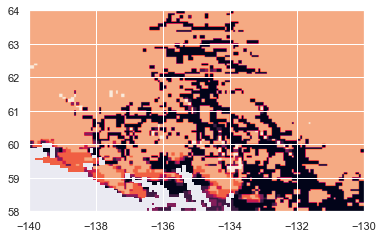

<AxesSubplot:>

In [7]:
rst_SoilResources_NutrientAvailability = r'output_SoilResources_NutrientAvailability.tif'
img_SoilResources_NutrientAvailability = rst.open(rst_SoilResources_NutrientAvailability)
show(img_SoilResources_NutrientAvailability)